In [1]:
import datetime
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cell2location
import scvi
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
datetime.datetime.now().strftime('%c')

Global seed set to 0
2023-10-25 19:58:24.952933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/gridengine/lib/lx-amd64:/opt/openmpi/lib
2023-10-25 19:58:25.889115: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 19:58:50.869308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/gridengine/lib/lx-amd64:/opt/openmpi/lib
2023-10-25 19:58:50.870203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open

'Wed Oct 25 19:59:23 2023'

## run ###

## bin 20 ##

In [2]:
GF_cecum = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/GF_cecum.bin20_after_dev.h5ad')
GF_colon = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/GF_colon.bin20_after_dev.h5ad')
GF_ileum1 = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/GF_ileum1.bin20_after_dev.h5ad')
GF_ileum2 = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/GF_ileum2.bin20_after_dev.h5ad')
SPF_cecum = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/SPF_cecum.bin20_after_dev.h5ad')
SPF_colon = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/SPF_colon.bin20_after_dev.h5ad')
SPF_ileum2 = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/SPF_ileum2.bin20_after_dev.h5ad')
SPF_ileum3 = sc.read_h5ad('/zfssz2/ST_TSCBI/P22Z10200N0433/USER/shenjuan/package/GF_SPF/2.cell2location/after_devolution/gut/gut_intergration_cell_type/SPF_ileum3.bin20_after_dev.h5ad')
datetime.datetime.now().strftime('%c')

'Wed Oct 25 20:11:22 2023'

In [3]:
GF_cecum.obs[GF_cecum.uns['mod']['factor_names']] = GF_cecum.obsm['q05_cell_abundance_w_sf'] 
GF_colon.obs[GF_colon.uns['mod']['factor_names']] = GF_colon.obsm['q05_cell_abundance_w_sf']
GF_ileum1.obs[GF_ileum1.uns['mod']['factor_names']] = GF_ileum1.obsm['q05_cell_abundance_w_sf']
GF_ileum2.obs[GF_ileum2.uns['mod']['factor_names']] = GF_ileum2.obsm['q05_cell_abundance_w_sf']
SPF_cecum.obs[SPF_cecum.uns['mod']['factor_names']] = SPF_cecum.obsm['q05_cell_abundance_w_sf']
SPF_colon.obs[SPF_colon.uns['mod']['factor_names']] = SPF_colon.obsm['q05_cell_abundance_w_sf']
SPF_ileum2.obs[SPF_ileum2.uns['mod']['factor_names']] = SPF_ileum2.obsm['q05_cell_abundance_w_sf']
SPF_ileum3.obs[SPF_ileum3.uns['mod']['factor_names']] = SPF_ileum3.obsm['q05_cell_abundance_w_sf']
datetime.datetime.now().strftime('%c')

'Wed Oct 25 20:11:34 2023'

In [4]:
GF_cecum.var_names_make_unique()
GF_cecum.obs_names_make_unique()
GF_colon.var_names_make_unique()
GF_colon.obs_names_make_unique()
GF_ileum1.var_names_make_unique()
GF_ileum1.obs_names_make_unique()
GF_ileum2.var_names_make_unique()
GF_ileum2.obs_names_make_unique()
SPF_cecum.var_names_make_unique()
SPF_cecum.obs_names_make_unique()
SPF_colon.var_names_make_unique()
SPF_colon.obs_names_make_unique()
SPF_ileum2.var_names_make_unique()
SPF_ileum2.obs_names_make_unique()
SPF_ileum3.var_names_make_unique()
SPF_ileum3.obs_names_make_unique()
datetime.datetime.now().strftime('%c')

'Wed Oct 25 20:11:35 2023'

In [5]:
print(GF_cecum,"\n")
print(GF_colon,"\n")
print(GF_ileum1,"\n")
print(GF_ileum2,"\n")
print(SPF_cecum,"\n")
print(SPF_colon,"\n")
print(SPF_ileum2,"\n")
print(SPF_ileum3,"\n")

AnnData object with n_obs × n_vars = 4113 × 18185
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'cell', 'x', 'y', 'old_x', 'old_y', '_indices', '_scvi_batch', '_scvi_labels', 'Activated T', 'B cycling', 'BC1', 'BC2', 'BC3', 'BC4', 'EC (Apoa4 high)', 'EC (Car1 high)', 'EC (Cmss1 high)', 'EC (Hmgcs2 high)', 'EC (Olfm4 high)', 'EC (Reg3g high)', 'EC (Saa1 high)', 'Endothelial', 'Enteroendocrine', 'Fgl2+ Cd8 Trm', 'Fibroblast', 'Fibroblast(Adamdec1 high)', 'Fibroblast(Sox6 high)', 'Foxp3+ Treg', 'Goblet1', 'Goblet2', 'Gpnmb+ Macrophage', 'ILC2', 'ILC3', 'Ifng+ CD8 Trm', 'IgA plasma', 'IgG plasma', 'Il6+ Macrophage', 'LEC', 'Lyve1+ Macrophage', 'Mast', 'Mesothelial cell', 'Migratory cDC', 'Mmp13+ Macrophage', 'Monocyte', 'NK', 'NKT', 'Neutrophil', 'Paneth', 'Plasma cycling', 'SMC', 'Sell + CD8 T', 'Sell+ CD4 T', 'T cycling', 'Terminal glial cell', 'Tfh', 'Th17', 'Tuft', 'cDC cycling', 'cDC1', 'gamadelta T', 'mLTo', 'pDC'
    var: 'features', 'mt_gene'
    uns: '_scvi_manager_

## join outer ##

In [6]:
adata2 = GF_cecum.concatenate(GF_colon, GF_ileum1, GF_ileum2, SPF_cecum, SPF_colon ,SPF_ileum2,SPF_ileum3,
                             index_unique=None,join = 'outer')
datetime.datetime.now().strftime('%c')

/ldfssz1/ST_OCEAN/USER/liaoshangfeng/software/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/ldfssz1/ST_OCEAN/USER/liaoshangfeng/software/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/ldfssz1/ST_OCEAN/USER/liaoshangfeng/software/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


'Wed Oct 25 20:11:58 2023'

In [7]:
adata2

AnnData object with n_obs × n_vars = 83473 × 24207
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'cell', 'x', 'y', 'old_x', 'old_y', '_indices', '_scvi_batch', '_scvi_labels', 'Activated T', 'B cycling', 'BC1', 'BC2', 'BC3', 'BC4', 'EC (Apoa4 high)', 'EC (Car1 high)', 'EC (Cmss1 high)', 'EC (Hmgcs2 high)', 'EC (Olfm4 high)', 'EC (Reg3g high)', 'EC (Saa1 high)', 'Endothelial', 'Enteroendocrine', 'Fgl2+ Cd8 Trm', 'Fibroblast', 'Fibroblast(Adamdec1 high)', 'Fibroblast(Sox6 high)', 'Foxp3+ Treg', 'Goblet1', 'Goblet2', 'Gpnmb+ Macrophage', 'ILC2', 'ILC3', 'Ifng+ CD8 Trm', 'IgA plasma', 'IgG plasma', 'Il6+ Macrophage', 'LEC', 'Lyve1+ Macrophage', 'Mast', 'Mesothelial cell', 'Migratory cDC', 'Mmp13+ Macrophage', 'Monocyte', 'NK', 'NKT', 'Neutrophil', 'Paneth', 'Plasma cycling', 'SMC', 'Sell + CD8 T', 'Sell+ CD4 T', 'T cycling', 'Terminal glial cell', 'Tfh', 'Th17', 'Tuft', 'cDC cycling', 'cDC1', 'gamadelta T', 'mLTo', 'pDC', 'batch'
    var: 'features-0', 'mt_gene-0', 'features

In [8]:
adata2 = adata2[adata2.obs["nFeature_Spatial"] > 50]

In [9]:
adata2

View of AnnData object with n_obs × n_vars = 75632 × 24207
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'cell', 'x', 'y', 'old_x', 'old_y', '_indices', '_scvi_batch', '_scvi_labels', 'Activated T', 'B cycling', 'BC1', 'BC2', 'BC3', 'BC4', 'EC (Apoa4 high)', 'EC (Car1 high)', 'EC (Cmss1 high)', 'EC (Hmgcs2 high)', 'EC (Olfm4 high)', 'EC (Reg3g high)', 'EC (Saa1 high)', 'Endothelial', 'Enteroendocrine', 'Fgl2+ Cd8 Trm', 'Fibroblast', 'Fibroblast(Adamdec1 high)', 'Fibroblast(Sox6 high)', 'Foxp3+ Treg', 'Goblet1', 'Goblet2', 'Gpnmb+ Macrophage', 'ILC2', 'ILC3', 'Ifng+ CD8 Trm', 'IgA plasma', 'IgG plasma', 'Il6+ Macrophage', 'LEC', 'Lyve1+ Macrophage', 'Mast', 'Mesothelial cell', 'Migratory cDC', 'Mmp13+ Macrophage', 'Monocyte', 'NK', 'NKT', 'Neutrophil', 'Paneth', 'Plasma cycling', 'SMC', 'Sell + CD8 T', 'Sell+ CD4 T', 'T cycling', 'Terminal glial cell', 'Tfh', 'Th17', 'Tuft', 'cDC cycling', 'cDC1', 'gamadelta T', 'mLTo', 'pDC', 'batch'
    var: 'features-0', 'mt_gene-0', '

In [10]:
adata2.var_names_make_unique()
adata2.obs_names_make_unique()

/ldfssz1/ST_OCEAN/USER/liaoshangfeng/software/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/ldfssz1/ST_OCEAN/USER/liaoshangfeng/software/anaconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:896: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_index(names, "var")


In [11]:
adata2

AnnData object with n_obs × n_vars = 75632 × 24207
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'cell', 'x', 'y', 'old_x', 'old_y', '_indices', '_scvi_batch', '_scvi_labels', 'Activated T', 'B cycling', 'BC1', 'BC2', 'BC3', 'BC4', 'EC (Apoa4 high)', 'EC (Car1 high)', 'EC (Cmss1 high)', 'EC (Hmgcs2 high)', 'EC (Olfm4 high)', 'EC (Reg3g high)', 'EC (Saa1 high)', 'Endothelial', 'Enteroendocrine', 'Fgl2+ Cd8 Trm', 'Fibroblast', 'Fibroblast(Adamdec1 high)', 'Fibroblast(Sox6 high)', 'Foxp3+ Treg', 'Goblet1', 'Goblet2', 'Gpnmb+ Macrophage', 'ILC2', 'ILC3', 'Ifng+ CD8 Trm', 'IgA plasma', 'IgG plasma', 'Il6+ Macrophage', 'LEC', 'Lyve1+ Macrophage', 'Mast', 'Mesothelial cell', 'Migratory cDC', 'Mmp13+ Macrophage', 'Monocyte', 'NK', 'NKT', 'Neutrophil', 'Paneth', 'Plasma cycling', 'SMC', 'Sell + CD8 T', 'Sell+ CD4 T', 'T cycling', 'Terminal glial cell', 'Tfh', 'Th17', 'Tuft', 'cDC cycling', 'cDC1', 'gamadelta T', 'mLTo', 'pDC', 'batch'
    var: 'features-0', 'mt_gene-0', 'features

In [12]:
# compute KNN using the cell2location output stored in adata.obsm
sc.pp.neighbors(adata2, use_rep='q05_cell_abundance_w_sf',n_neighbors = 15)

# Cluster spots into regions using scanpy
sc.tl.leiden(adata2, resolution=1.1)

# add region as categorical variable
adata2.obs["region_cluster"] = adata2.obs["leiden"].astype("category")
datetime.datetime.now().strftime('%c')

'Wed Oct 25 20:15:55 2023'

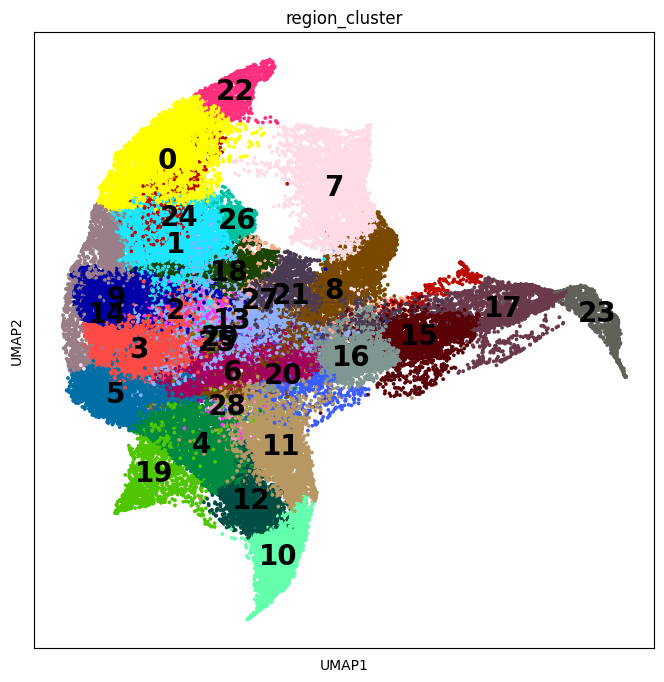

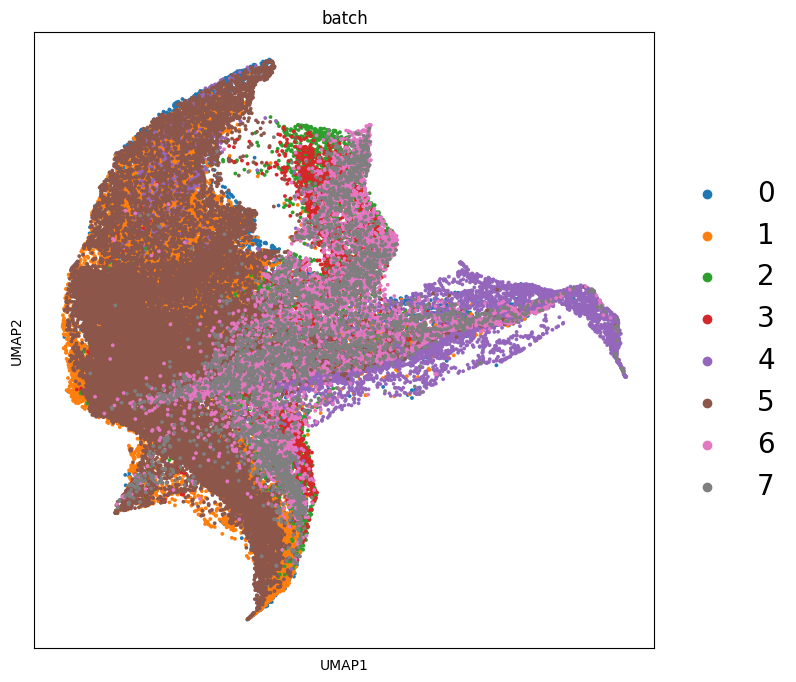

'Wed Oct 25 20:20:27 2023'

In [13]:
# compute UMAP using KNN graph based on the cell2location output
sc.tl.umap(adata2, min_dist = 0.3, spread = 1)

# show regions in UMAP coordinates
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [8, 8]}):
    sc.pl.umap(adata2, color=['region_cluster'], size=30,
               color_map = 'RdPu', ncols = 2, legend_loc='on data',
               legend_fontsize=20)
    sc.pl.umap(adata2, color=['batch'], size=30,
               color_map = 'RdPu', ncols = 2,
               legend_fontsize=20)
datetime.datetime.now().strftime('%c')

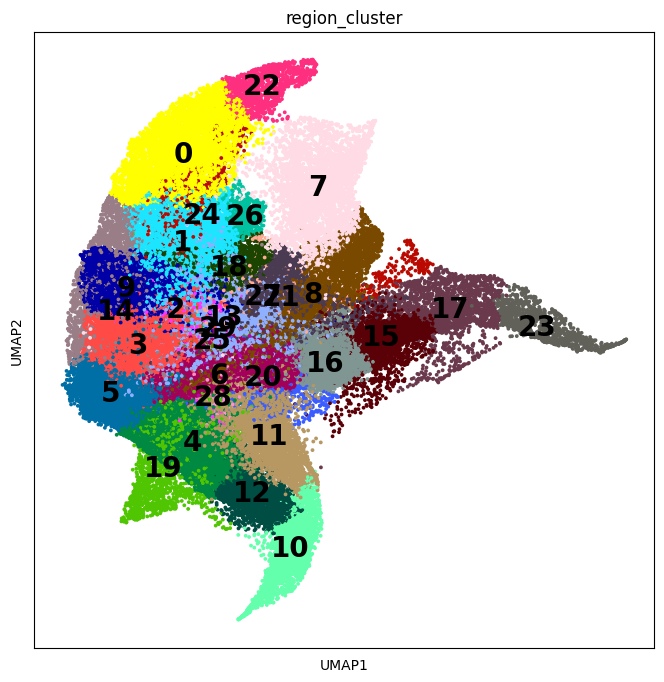

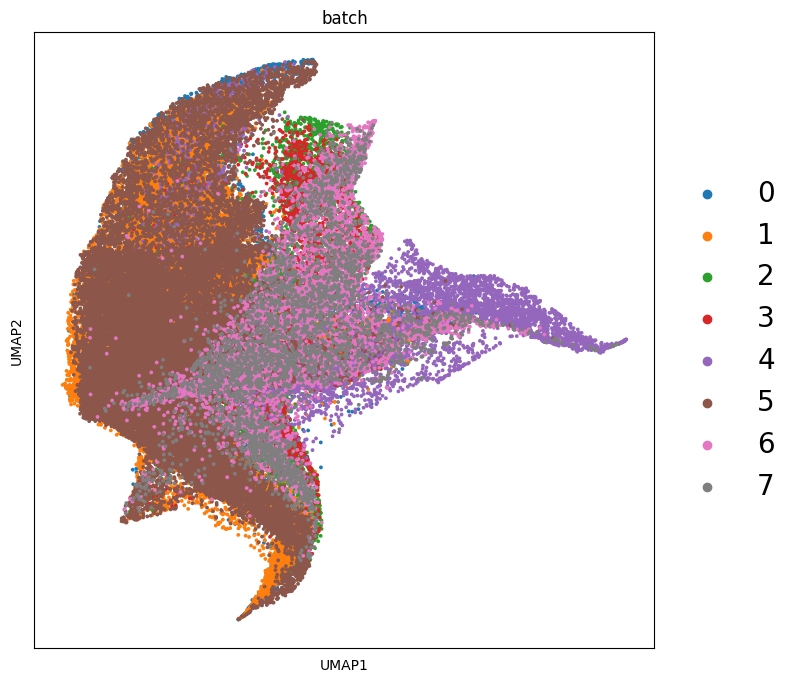

'Wed Oct 25 20:26:39 2023'

In [35]:
# compute UMAP using KNN graph based on the cell2location output
sc.tl.umap(adata2, min_dist = 0.5, spread = 1)

# show regions in UMAP coordinates
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [8, 8]}):
    sc.pl.umap(adata2, color=['region_cluster'], size=30,
               color_map = 'RdPu', ncols = 2, legend_loc='on data',
               legend_fontsize=20)
    sc.pl.umap(adata2, color=['batch'], size=30,
               color_map = 'RdPu', ncols = 2,
               legend_fontsize=20)
datetime.datetime.now().strftime('%c')

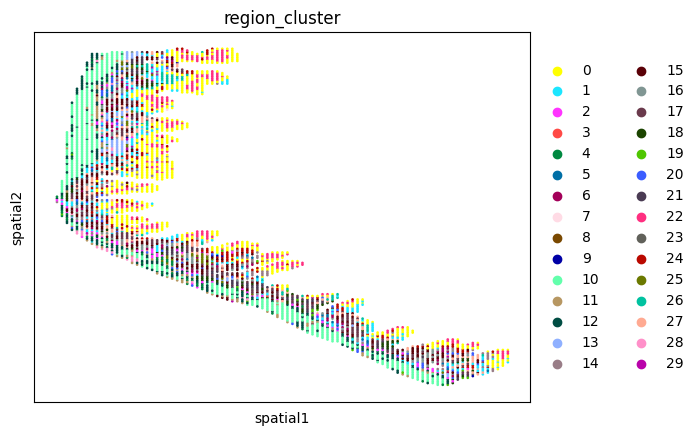

In [22]:
f0 = adata2[adata2.obs['batch'] == "0"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=15 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

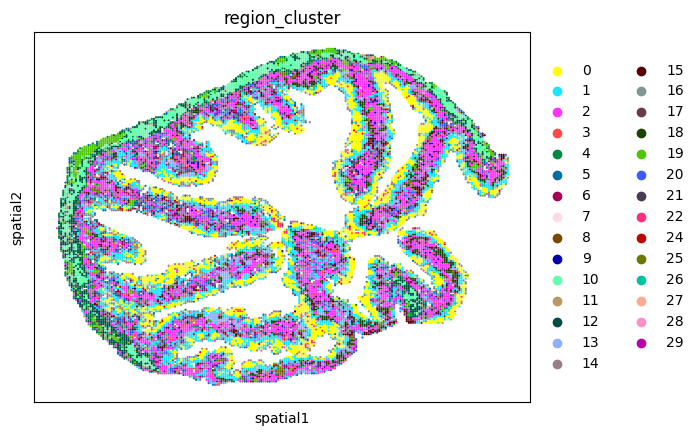

In [23]:
f0 = adata2[adata2.obs['batch'] == "1"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=10 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

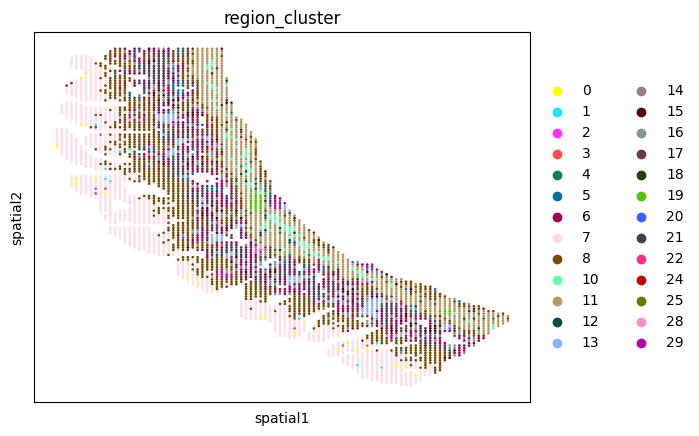

In [24]:
f0 = adata2[adata2.obs['batch'] == "2"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=15 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

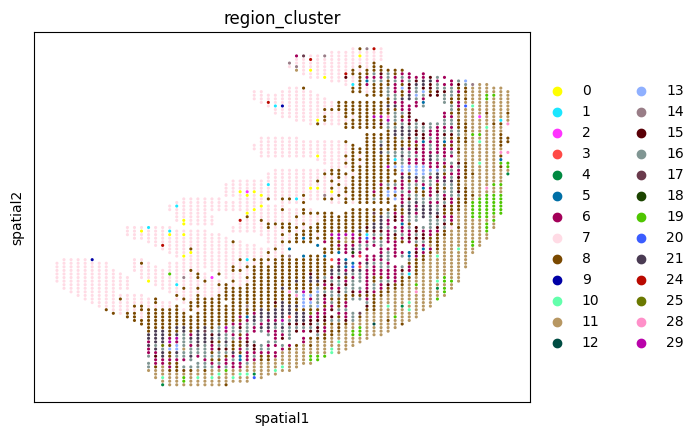

In [25]:
f0 = adata2[adata2.obs['batch'] == "3"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=20 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

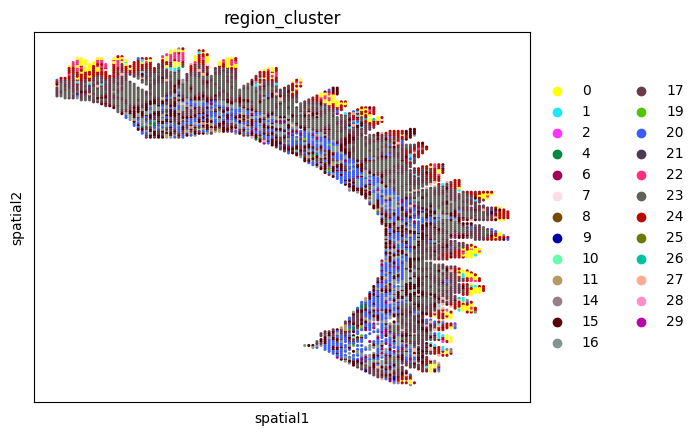

In [26]:
f0 = adata2[adata2.obs['batch'] == "4"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=20 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

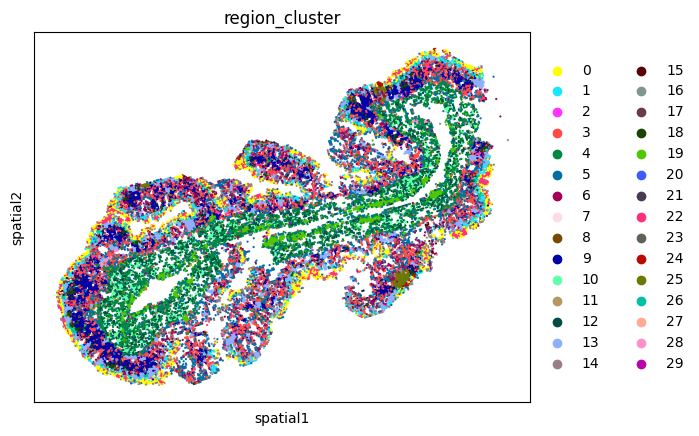

In [27]:
f0 = adata2[adata2.obs['batch'] == "5"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=10 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

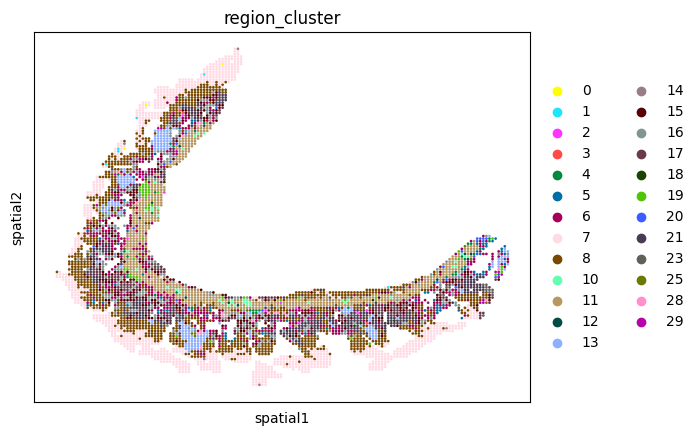

In [28]:
f0 = adata2[adata2.obs['batch'] == "6"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=15 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

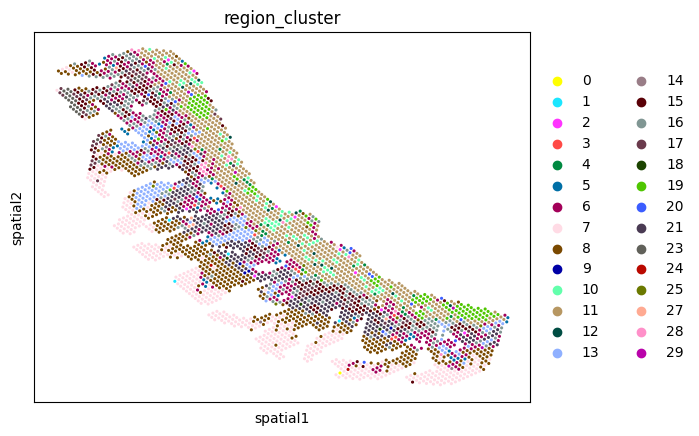

In [29]:
f0 = adata2[adata2.obs['batch'] == "7"]
sc.pl.embedding(f0, basis="spatial", # 选择 obsm['spatail']槽的数据,空间信息
                    color= "region_cluster",  # 细胞类型
                    ncols=1, # 
                    size=20 ,# 点的大小
                    #cmap=['paleturquoise3','darkolivegreen2','lightsteelblue','salmon','lightskyblue3','orchid3','moccasin','thistle2','gray85','sandybrown'],
                    vmin=0, # feature展示的取值范围
                    vmax='p99.99', # feature展示的取值范围
                    alpha=1,
                    frameon=True, 
                    legend_fontsize=10,
                    wspace=0.15,
                    show=True, legend_loc="right margin",use_raw = False)

In [30]:
adata2

AnnData object with n_obs × n_vars = 75632 × 24207
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'cell', 'x', 'y', 'old_x', 'old_y', '_indices', '_scvi_batch', '_scvi_labels', 'Activated T', 'B cycling', 'BC1', 'BC2', 'BC3', 'BC4', 'EC (Apoa4 high)', 'EC (Car1 high)', 'EC (Cmss1 high)', 'EC (Hmgcs2 high)', 'EC (Olfm4 high)', 'EC (Reg3g high)', 'EC (Saa1 high)', 'Endothelial', 'Enteroendocrine', 'Fgl2+ Cd8 Trm', 'Fibroblast', 'Fibroblast(Adamdec1 high)', 'Fibroblast(Sox6 high)', 'Foxp3+ Treg', 'Goblet1', 'Goblet2', 'Gpnmb+ Macrophage', 'ILC2', 'ILC3', 'Ifng+ CD8 Trm', 'IgA plasma', 'IgG plasma', 'Il6+ Macrophage', 'LEC', 'Lyve1+ Macrophage', 'Mast', 'Mesothelial cell', 'Migratory cDC', 'Mmp13+ Macrophage', 'Monocyte', 'NK', 'NKT', 'Neutrophil', 'Paneth', 'Plasma cycling', 'SMC', 'Sell + CD8 T', 'Sell+ CD4 T', 'T cycling', 'Terminal glial cell', 'Tfh', 'Th17', 'Tuft', 'cDC cycling', 'cDC1', 'gamadelta T', 'mLTo', 'pDC', 'batch', 'leiden', 'region_cluster'
    var: 'feature

In [38]:
adata2.obs.to_csv("/jdfssz1/ST_TSCBI/P22Z10200N0433/USER/liangweiming/03_project/08_WholeGF/34_cell2Cluster/bin20_outer_cell2Cluster1.1_Filter_new.csv")